In [ ]:
#Mirza Baig 1154665
#ENGG3130 Lab One

In [1]:
import math

In [2]:
import numpy

In [3]:
import scipy

In [4]:
from scipy import io as spio

In [5]:
import matplotlib.pyplot as plt

In [6]:
def model (t, Ti, Ta, c):
    
    if (type(t) == float):
        return ((Ti - Ta)*math.exp(-t/c)) + Ta
    else:
        return [((Ti - Ta) * math.exp(-element / c) + Ta) for element in t]

In [7]:
model(10.0, 100, 0, 10)

36.787944117144235

In [8]:
ts = numpy.linspace(0, 3600, 4)

In [9]:
ts

array([   0., 1200., 2400., 3600.])

In [10]:
model(ts, 100, 20, 500)

[100.0, 27.257436263153, 20.6583797639216, 20.059726864670136]

In [11]:
matDict = numpy.zeros((385, 2))
matDict = spio.loadmat('time_temp.mat')
#the loaded matlab script loads into a dictionary

In [12]:
matArr = numpy.array(matDict['data'])
#extract data column from matlab so we can convert from dict to 2D array

In [13]:
tsArr,TsArr = numpy.split(matArr, 2, axis=1)
#split the 2D array into two arrays

In [22]:
TsArrOneD = TsArr.flatten()
tsArrOneD = tsArr.flatten()
#the split arrays are actually 2D with (385, 1) so we flatten them into 1D arrays

Text(0, 0.5, 'Temperature (degrees Celcius)')

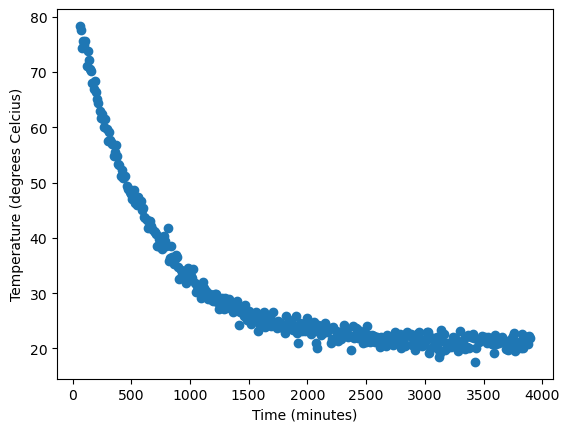

In [31]:
plt.plot(tsArrOneD, TsArrOneD, 'o')
plt.xlabel('Time (minutes)')
plt.ylabel('Temperature (degrees Celcius)')
#generate a plot from the values obtained (base graph)

In [42]:
def extract_parameters (ts, Ts):   
    parameters, covariance = scipy.optimize.curve_fit(model, ts, Ts, p0 =[80, 10, 300])
    
    #run scipy curve fit to extract values that represent the best correlation, store the variables
    #Ti, Ta and C of best fit in parameters
    
    TiFit = parameters[0]
    TaFit = parameters[1]
    cFit = parameters[2]
    
    TFit = model(ts, TiFit, TaFit, cFit)
    
    #create the curve of best fit and layer it onto the original graph to indicate the correlation
    plt.plot(ts, Ts, 'ro', label = "Base")
    plt.plot(ts, TFit, 'o', label = 'Fit')
    plt.xlabel('Time (minutes)')
    plt.ylabel('Temperature (degrees Celcius)')
    plt.legend()
    
    return tuple(parameters)

(84.08442548431158, 21.0115286419755, 599.243100287051)

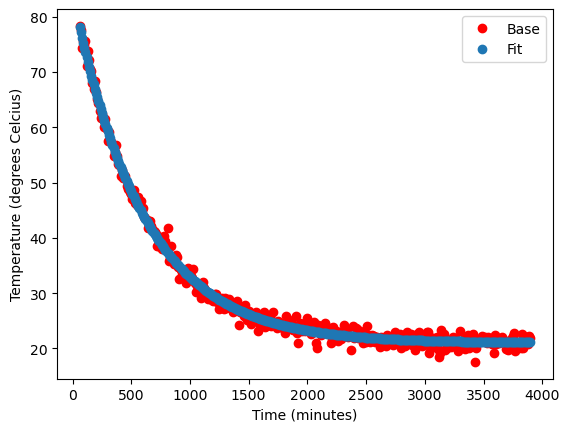

In [43]:
extract_parameters(tsArrOneD, TsArrOneD)

In [127]:
def sixty_degree_time(Ti, Ta, c):
    
    #sub in T = 60 with the main model equation (isolated for t), along with subbing in values for Ti, Ta and c
    t = -c*math.log((60-Ta)/(Ti*Ta))
    
    return t

In [128]:
sixty_degree_time(100, 20, 10)

39.12023005428146

# Research Answers

    The initial temperature is observed to be approximately 80 degrees celsius from the best fit graph.

    The tea cooling down represents a limit approaching room temperature (around 21 degrees celsius) from infinity (or in this case approximately 80 degrees celsius). The tea is safe to drink at around 300 minutes where the temperature is 60 degrees celsius from the graph. I would like to test the sixty_degree_function but we do not have the value of C or Ti in the problem question. 

    If we wait indefinitely, the temperature of the tea will be around 21 degrees celsius which is evident from the graph and the array values obtained from the experiment. This is because the room temperature is most likely 21 degrees celsius.